In [3]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv('data/Titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Missing values in Age column

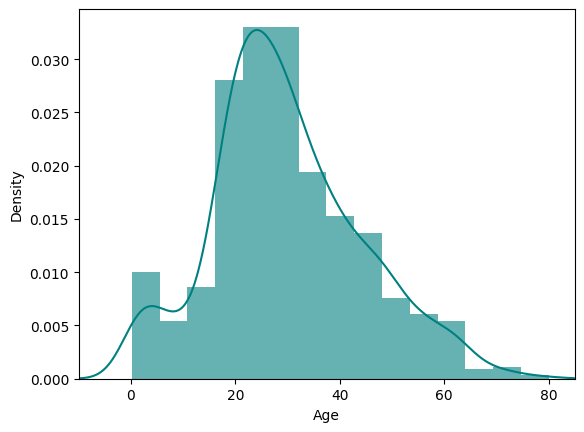

In [7]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [8]:
# mean age
print('Mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('Median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

Mean of "Age" is 29.88
Median of "Age" is 28.00


In [9]:
#Fill missing values - we'll use the median since the data is right skewed.
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

### Missing values in Cabin column:

In [10]:
# percent of missing "Cabin" 
print('Percent missing in "Cabin" column: %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100)) 

Percent missing in "Cabin" column: 77.46%


77% of the column is missing...

We can also see that many people have a NaN for Cabin. It’s not as easy as just fill a dummy value here. We could fill with “no cabin”, but for machine learning, we like to have numerical or bool values. To achieve this, lets make a new bool column where we assume that everyone with NaN values have no cabin:

Cabin = True / False
And set all NaN values = False, all other = True

In [ ]:
#Add a new column for HasCabin
df["HasCabin"] = df.Cabin.notnull()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


**Discussion: Which approach did you choose and why?**

I chose to create a new boolean feature 'HasCabin' rather than dropping the entire Cabin column because:

1. **Information preservation**: Even though ~77% of values are missing, the presence or absence of a cabin assignment could be meaningful for survival prediction
2. **Socioeconomic indicator**: Having a cabin likely correlates with passenger class and fare, which are known survival factors
3. **Feature engineering opportunity**: Converting missing data into a meaningful binary feature is a common and effective technique

Alternative approaches could include:
- Dropping the column entirely due to high missingness
- Extracting cabin deck information from non-missing values
- Using advanced imputation techniques

### Missing values in Embarked column:

There were 2 missing values in the embarked column. Let's have alook at them.

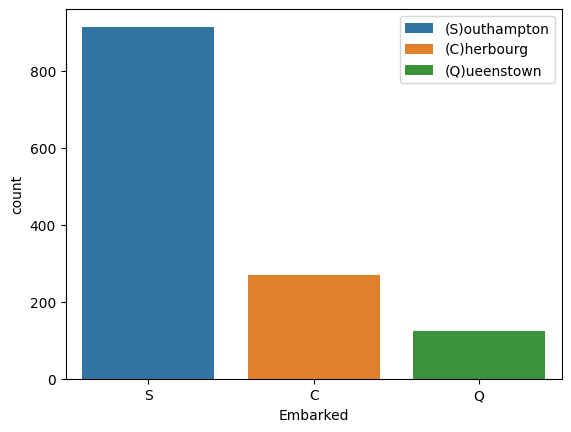

In [11]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.countplot(x='Embarked', data=df, hue='Embarked')
# set legend to C = Cherbourg, Q = Queenstown, S = Southampton
plt.legend(['(S)outhampton', '(C)herbourg', '(Q)ueenstown'])
plt.show()

In [12]:
# We'll fill them with the most common value, which is "S".
df["Embarked"] = df["Embarked"].fillna("S")

In [13]:
#Lets add a new column called Title (regex101.com)
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) 

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/wx/7zxpzgbj5yqb24_kv9vjc2l00000gn/T/ipykernel_40401/3149641519.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


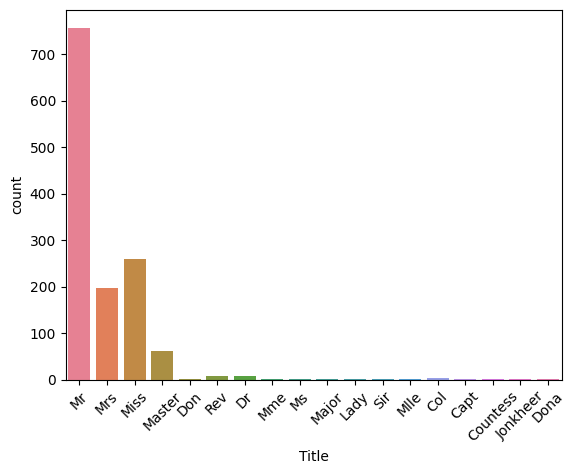

In [14]:
sns.countplot(x='Title', data=df, hue='Title');
plt.xticks(rotation=45);

In [15]:
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

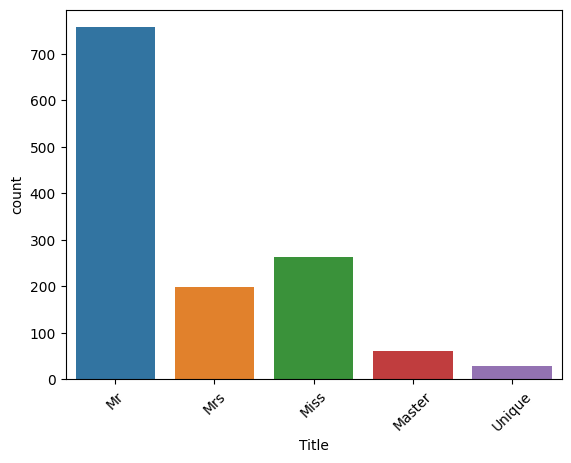

In [16]:
# Grouping titles to
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Unique')
sns.countplot(x='Title', data=df, hue='Title');
plt.xticks(rotation=45);

In [17]:
# Creating numerical columns for age and fare
# qcut is used to discretize variables into equal-sized buckets, in order to create a categorical variable
# Think of it as creating 4 bins of age range 0, 1, 2, 3
df['CatAge'] = pd.qcut(df.Age, q=4, labels=False)
df['CatFare']= pd.qcut(df.Fare, q=4, labels=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CatAge,CatFare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,1


In [18]:
#Dropping columns that wont make sense in binary format
df = df.drop(["PassengerId", "Age", "Fare", "Cabin", "Name", "Ticket"], axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,CatAge,CatFare
0,0.0,3,male,1,0,S,Mr,0,0
1,1.0,1,female,1,0,C,Mrs,3,3
2,1.0,3,female,0,0,S,Miss,1,1
3,1.0,1,female,1,0,S,Mrs,2,3
4,0.0,3,male,0,0,S,Mr,2,1


In [19]:
# Converting to binary values
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,Survived,Pclass,SibSp,Parch,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,0.0,3,1,0,0,0,True,False,True,False,True,False,False
1,1.0,1,1,0,3,3,False,False,False,False,False,True,False
2,1.0,3,0,0,1,1,False,False,True,True,False,False,False
3,1.0,1,1,0,2,3,False,False,True,False,False,True,False
4,0.0,3,0,0,2,1,True,False,True,False,True,False,False


In [18]:
df_dum.to_csv('data/Titanic_Cleaned.csv', index=False)